In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [2]:
file_path = r"google.xlsx"
df = pd.read_excel(file_path, index_col = 'date', parse_dates = True)
close = df[['4. close']]
close

,4. close
date,
2020-05-05,1351.11
2020-05-06,1347.30
2020-05-07,1372.56
2020-05-08,1388.37
2020-05-11,1403.26
...,...
2020-09-18,1459.99
2020-09-21,1431.16
2020-09-22,1465.46


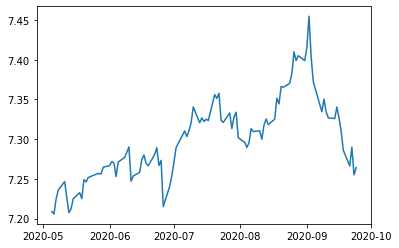

In [4]:
lnclose = np.log(close)
lnclose
plt.plot(lnclose)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<Figure size 4320x720 with 0 Axes>

<Figure size 4320x720 with 0 Axes>

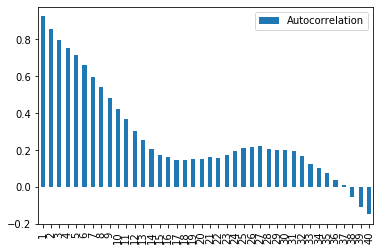

In [5]:
plt.figure(figsize = (60,10))
a = acf(lnclose)[1:100]
test_df = pd.DataFrame([a]).T

test_df.columns = ['Autocorrelation']
plt.figure(figsize = (60,10))
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

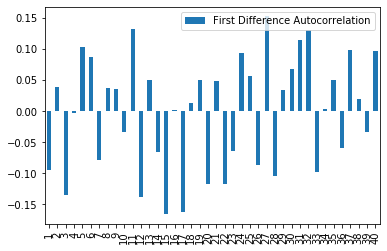

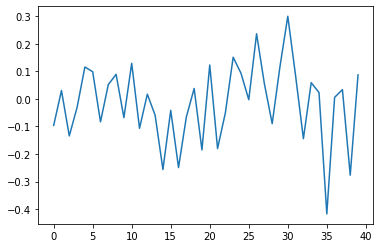

In [6]:
result = ts.adfuller(lnclose, 1)
result
lnclose_diff = lnclose-lnclose.shift()
diff = lnclose_diff.dropna()
a_diff = acf(diff)[1:100]
test_df = pd.DataFrame([a_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
p_diff = pacf(diff)[1:100]
plt.figure()
plt.plot(p_diff)
plt.show()

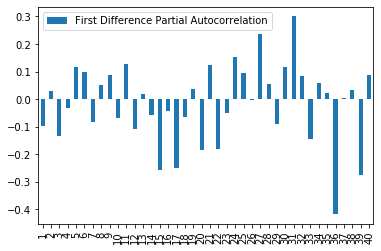

In [7]:
test_df = pd.DataFrame([p_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

predicted=1429.069596
predicted=1429.849192
predicted=1430.628788
predicted=1431.408384
predicted=1432.187980
predicted=1432.967576
predicted=1433.747172
predicted=1434.526768
predicted=1435.306364
predicted=1436.085960


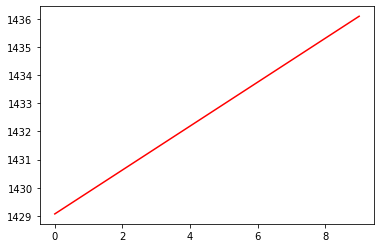

In [8]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=1429.069596
predicted=1429.849192
predicted=1430.628788
predicted=1431.408384
predicted=1432.187980
predicted=1432.967576
predicted=1433.747172
predicted=1434.526768
predicted=1435.306364
predicted=1436.085960


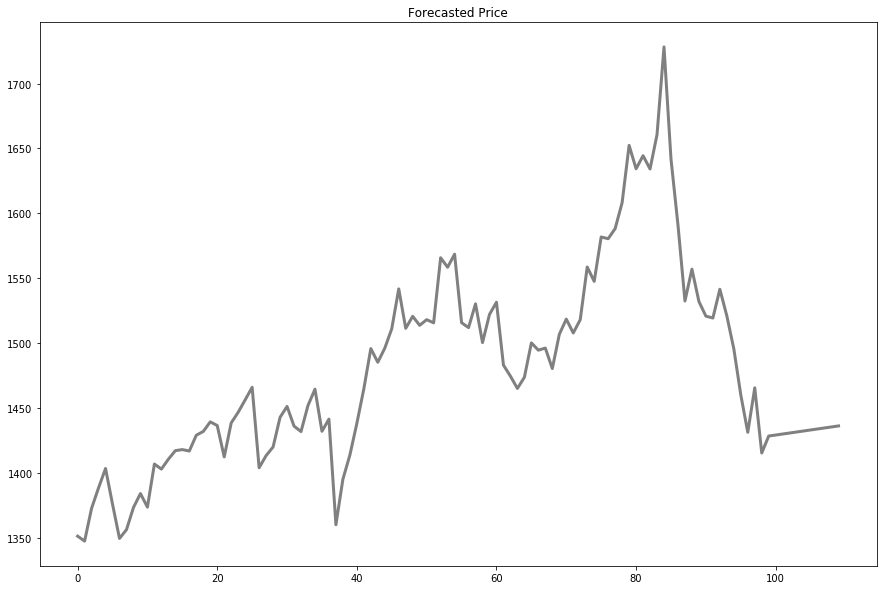

In [9]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'grey', lw = 3)
plt.title('Forecasted Price')
plt.show()

In [10]:
# open
opening = df[['1. open']]
# high
high = df[['2. high']]
# low
low = df[['3. low']]

predicted=1411.768485
predicted=1412.506970
predicted=1413.245455
predicted=1413.983939
predicted=1414.722424
predicted=1415.460909
predicted=1416.199394
predicted=1416.937879
predicted=1417.676364
predicted=1418.414848


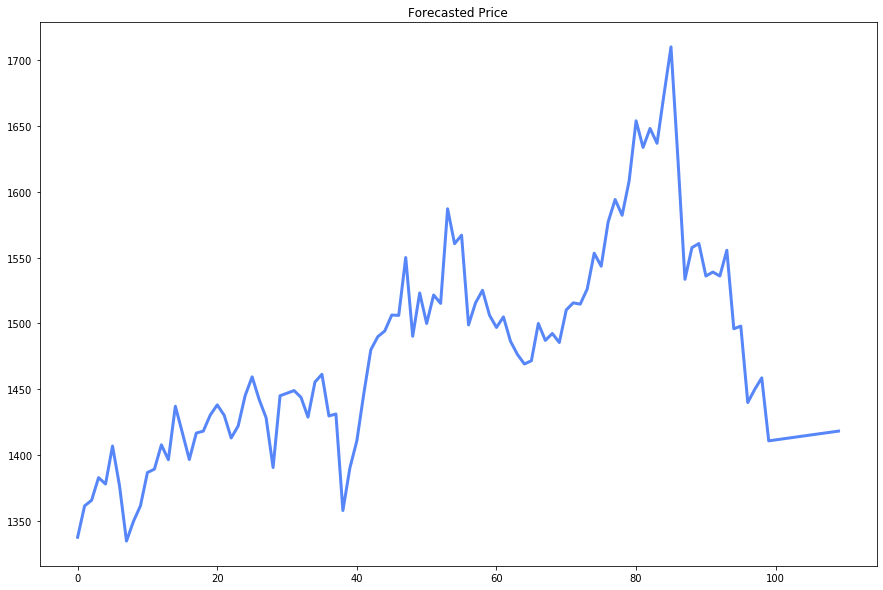

In [11]:
X = opening.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = '#5786f8', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=1444.413535
predicted=1445.118271
predicted=1445.823006
predicted=1446.527741
predicted=1447.232477
predicted=1447.937212
predicted=1448.641947
predicted=1449.346683
predicted=1450.051418
predicted=1450.756154


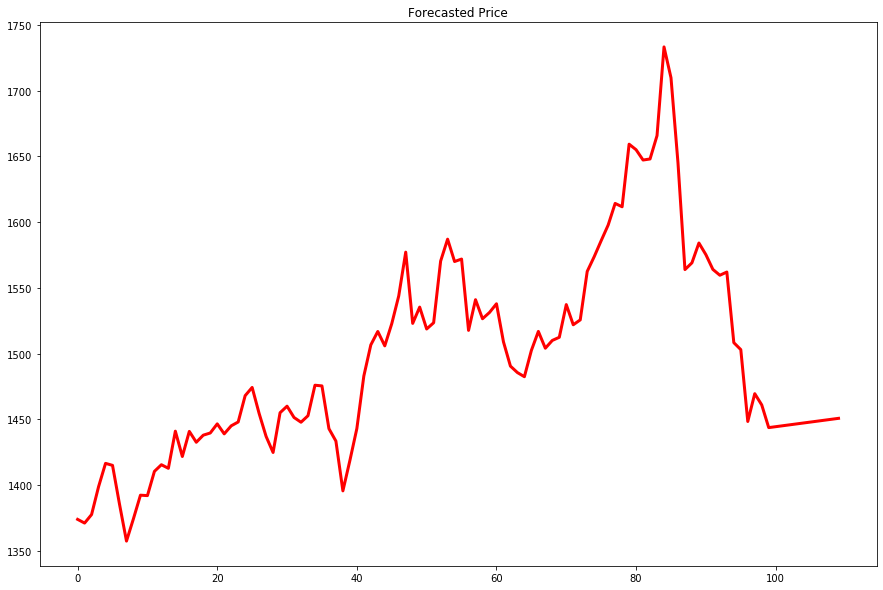

In [12]:
X = high.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'r', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=1410.581212
predicted=1411.312424
predicted=1412.043637
predicted=1412.774849
predicted=1413.506061
predicted=1414.237274
predicted=1414.968486
predicted=1415.699698
predicted=1416.430910
predicted=1417.162122


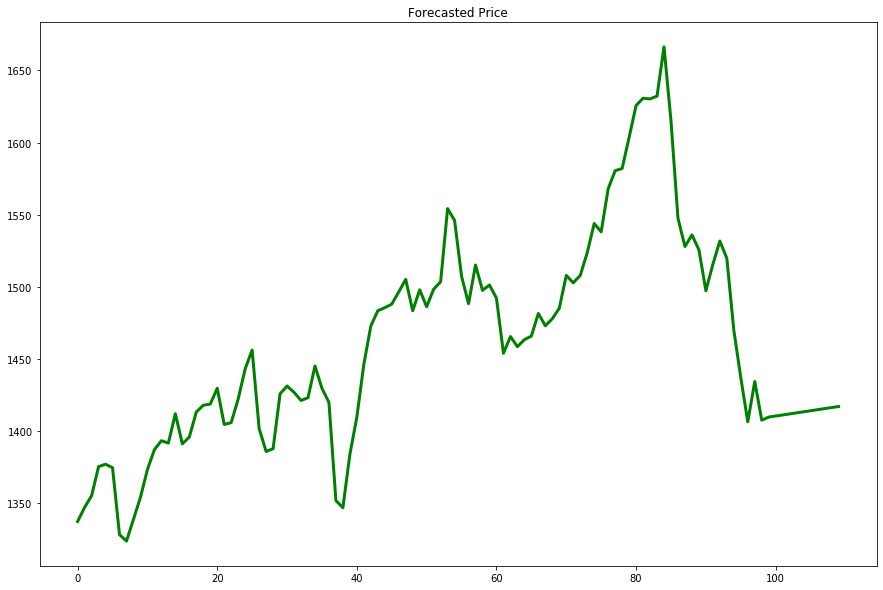

In [13]:
X = low.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'g', lw = 3)
plt.title('Forecasted Price')
plt.show()